## Discrete Time Fourier Transform (DTFT)

Q1. Compute the DTFT (magnitude and phase) of the following (use <i>scipy.signal.freqz</i>). Plot from $\omega = −2\pi$ to $2\pi$. Observe the symmetries and relations between the spectra.

https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.freqz.html

<ol>
  <li>$r[n] = u[n] − u[n − 5]$  </li>
 <li>$r[n − 7]$  </li>
  <li>$r[n + 4]$ </li>
    <li>$r[−n]$ </li>
    <li>$(−1)^nr[n]$ </li>
</ol>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

def get_freq_resp( num, den, c_range=np.arange(-2*np.pi, 2*np.pi, 4*np.pi/4096)):
    w1,h1=sig.freqz(num,den,c_range)
    h1db=20*np.log10(abs(h1))
    
    #print("b=" ,num)
    #print("a=",den)
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(w1/(2*np.pi),h1db)
    plt.title("Magnitude response")
    plt.ylabel("magnitude in DB")
    plt.xlabel(" w / 2.pi ")

    angles = np.angle(h1)
    plt.subplot(122)
    plt.plot(w1/(2*np.pi), angles, 'g')
    plt.title("Phase response")
    plt.ylabel("Phase in radians")
    plt.xlabel(" w / 2.pi ")
    plt.show()


 Part 1  $ 𝑟[𝑛]=𝑢[𝑛]−𝑢[𝑛−5] $

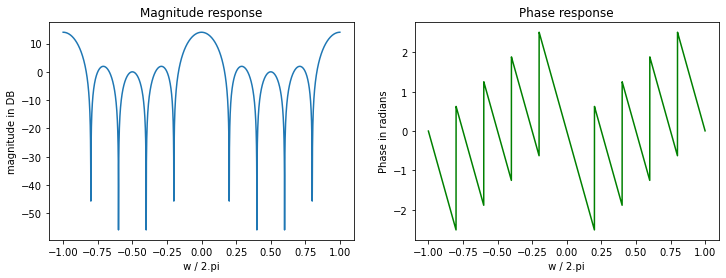

In [3]:
#signal = 
b1 = np.ones(5)
a1 = 1
get_freq_resp(b1,a1)

Part 2 : 𝑟[𝑛−7] where r[n] = u[n] - u[n-5]

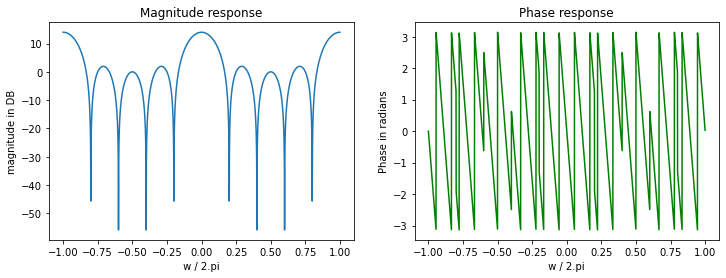

In [4]:
# signal = [ 0,0,0,0,0,0,0,1,1,1,1,1,1]
b2 = np.array([0,0,0,0,0,0,0,1,1,1,1,1])
a2=1
get_freq_resp(b2, a2)

Part 3 : $ r[n+4] $  where r[n] = u[n]-u[n-5]

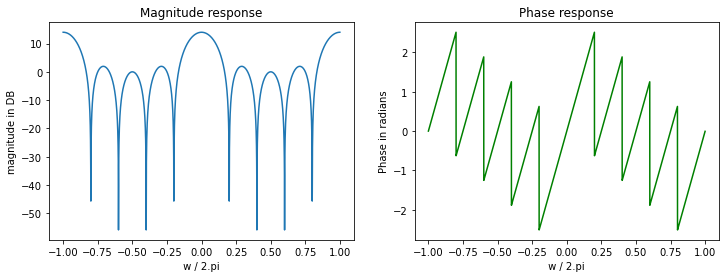

In [5]:
b3 = [1,1,1,1,1]
a3 = [0,0,0,0,1]
get_freq_resp(b3,a3)

part 4: 𝑟[−𝑛] where r[n] = u[n]-u[n-5]

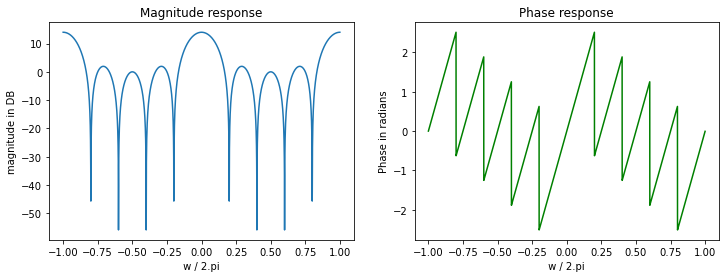

In [6]:
b4 = [1,1,1,1,1]
a4 = [0,0,0,0,1]
get_freq_resp(b4,a4)

 Part 5 : $ (-1)^n r[n] $

In [7]:
# part 5 
b5 = [1,-1,1,-1,1]
a5 = 1

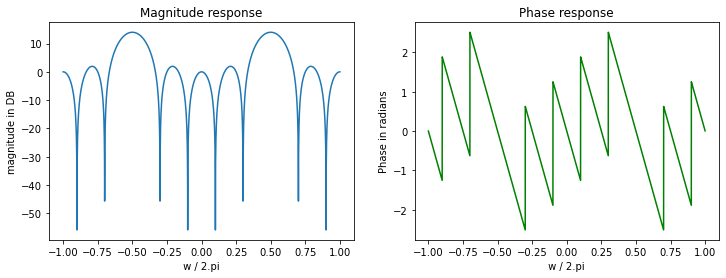

In [8]:
get_freq_resp(b5,a5)

**Q1 observations - 
  <br>1.part 2,3,4 are shifted or flipped versions of part 1. hence their magnitude responses are similar but phase responses are different.
  <br>2.part 3 and part 4 are exactly same signals , hence both their responses are same.
  <br>3.Magnitude responses are even and phase responses are odd.**
  
 ---

Q2. Consider the sinusoid $s[n] = (A cos(\omega_0n +\phi))$ where A = 2; $\omega_0 = \pi/4$; $ \phi = \pi/6$. Compute and plot the DTFT from $[−\pi~~+\pi]$. Use samples from a
finite time window
<ol>
  <li>$n = [0, 21]$  </li>
 <li>$n = [0, 201]$  </li>  
</ol> Observe and compare
the spectrum in both cases.

<i>Note: While plotting the spectrum please obtain lot of points (eg. 4096) so that the details are not lost.</i>

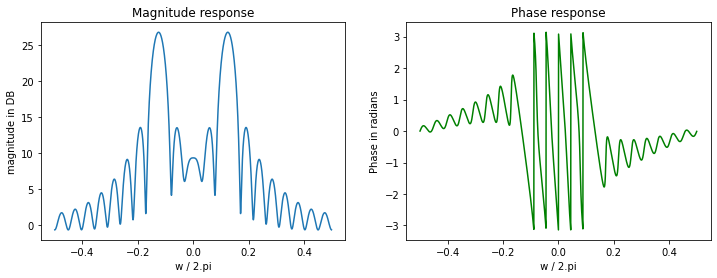

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
n = np.arange(0,22)
A = 2
w0 = np.pi/4
phi = np.pi/6
S_n = A*np.cos(w0*n + phi)
get_freq_resp(S_n, 1, c_range= np.arange(-np.pi, np.pi,4*np.pi/4096))

In [1]:
#w = 1 correspondes to 2*pi
#w = pi/4 corresponds to 0.125, 

#Hence magnitude at 0.125 is higher.

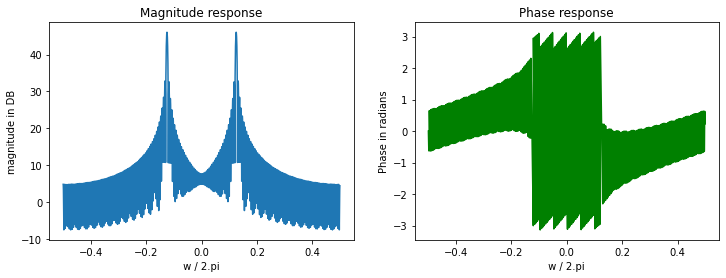

In [10]:
n2 = np.arange(201)
A = 2
w0 = np.pi/4
phi = np.pi/6
S_n2 = A*np.cos(w0*n2 + phi)
get_freq_resp(S_n2, 1, c_range= np.arange(-np.pi, np.pi,4*np.pi/4096))

**Q2 observations - As n increases , more spectral details are visible.**

----

Q3. Consider a signal $x[n] ~ =~u[n]-u[n-6]$. Plot the DTFT of the signal $X(e^{j\omega})$ in $[-\pi ~~+\pi]$. Consider an expanded version of the signal

$ z[n]= \begin{cases}x[\frac{n}{2}]~~,~~~n~~even\\0~~,~~~~n~~~odd\end{cases}$
 
Plot $Z(e^{j\omega})$(magnitude and phase separately). What is the periodicity of the DTFT? Observe the effect     of expanding time axis in the frequency domain. 


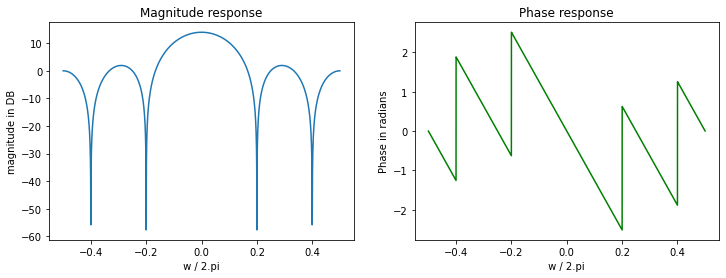

In [11]:
##code
b = np.ones((6,1))
a = 1
get_freq_resp(b1,a , c_range=np.arange(-np.pi, np.pi, 2*np.pi/4096))

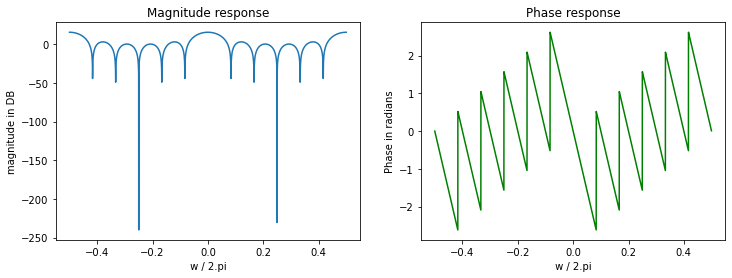

In [12]:
#  PART 2  z[n] = x[n/2]
b = [1,0,1,0,1,0,1,0,1,0,1,0]
a = 1
get_freq_resp(b,a , c_range = np.arange(-np.pi, np.pi, 2*np.pi/4096))

**Q3 observations : 1. when z[n] is upsampled of x[n] by factor 2 i.e. expanded in time domain, 
 the frequency response of z[n] will be compressed by factor 2 in w-domain.
 <br> 2. DTFT is always periodic with 2 pi.**
 
 ---

Q4. Consider the signals $x[n] = n(u[n]- u[n-4])$ and $y[n] = 0.9^n(u[n] - u[n-10])$. Find the convolution $z[n] = x[n] * y[n]$ of the signals. Plot $X(e^{j\omega})$, $Y(e^{j\omega})$ and $Z(e^{j\omega})$ (magnitude and phase separately).  


In [18]:
##code
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

n = np.arange(4)
x_n = n*np.ones(4)

n2 = np.arange(10)
y_n = np.power(0.9,n2) * np.ones(10)
y_n

array([1.        , 0.9       , 0.81      , 0.729     , 0.6561    ,
       0.59049   , 0.531441  , 0.4782969 , 0.43046721, 0.38742049])

In [19]:
z_n = sig.convolve(x_n, y_n)
z_n

array([0.        , 1.        , 2.9       , 5.61      , 5.049     ,
       4.5441    , 4.08969   , 3.680721  , 3.3126489 , 2.98138401,
       2.68324561, 2.06624261, 1.16226147])

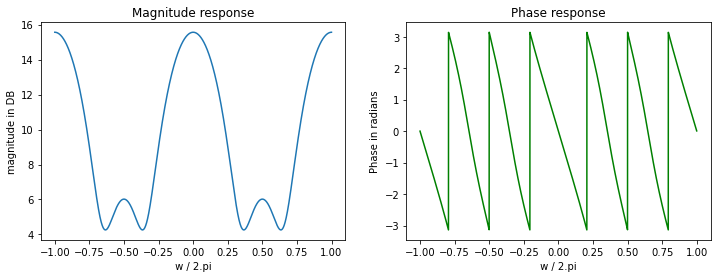

In [20]:
# Plot of DTFT of x_n
get_freq_resp(x_n, 1)

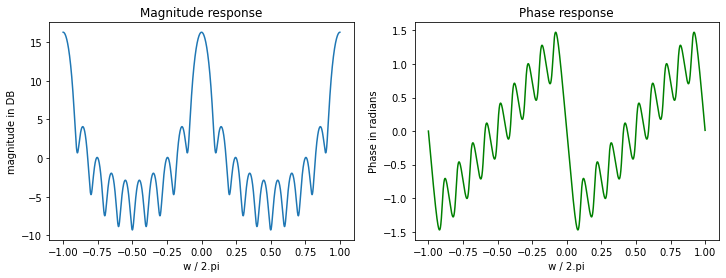

In [21]:
# PLOT of DTFT of y_n
get_freq_resp(y_n, 1)

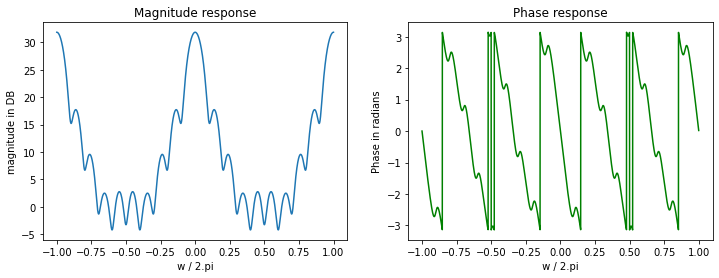

In [22]:
get_freq_resp(z_n, 1)

**Q4 observations
 <br> 1. magnitude response of convolution of x and y is the addition( in log, or we can say multiplication) of the magnitude responses of x and y individually.**

Q5. Find the DTFT of the given speech signals that corresponds to two vowels (/a/ and /i/). Which vowel has more high frequency content? 


<ipython-input-13-a551b18732ba>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate_a, data_a = wav.read('a.wav')
<ipython-input-13-a551b18732ba>:11: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate_i, data_i = wav.read('i.wav')


44100
44100


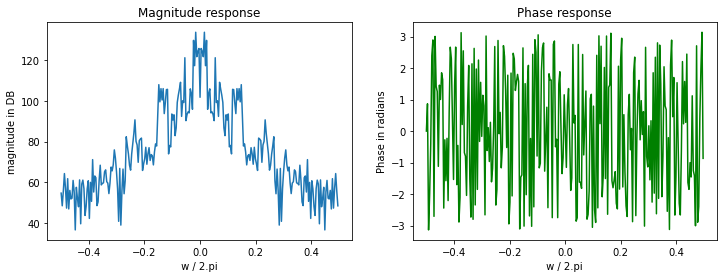

In [13]:
##code

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.io.wavfile as wav

rate_a, data_a = wav.read('a.wav')
print(rate_a)

rate_i, data_i = wav.read('i.wav')
print(rate_i)

get_freq_resp(data_a,1, c_range=np.arange(-np.pi, np.pi, 2*np.pi/256))

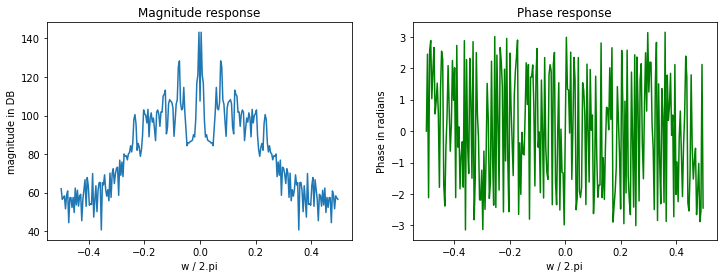

In [14]:
get_freq_resp(data_i,1 ,  c_range=np.arange(-np.pi, np.pi, 2*np.pi/256))

**Observations - More High Frequency components are present in vowel "i".**